# Introduction

It is common that people can come up with conclusions just for the sake of using statistical analysis defending their opinions using complex methodologies. Nonetheless, as someone stated years ago, it does not matter if the model or the metholodolgie is the best, if the input is no adequate, the results will be wrong.

To make this point clearer, I selected a dataset from reddit where people self reported if they consider themselves Financial Independent (FI), more than 50 features were collected,, nonetheless, with some basic analysis it will be shown that it's not representative of the population and it is biased.

In [1]:
# @title
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

reddit_finance = pd.read_csv("finance.csv")

import pandas as pd


def getting_pct(data, var):
    # Create a table
    my_table = pd.crosstab(data[var], data["fin_indy"])

    # Convert the table to a DataFrame
    new_df = pd.DataFrame(my_table).reset_index()

    new_df["Sum"] = new_df["No"] + new_df["Yes"]
    new_df["pct"] = round(new_df["Yes"] / new_df["Sum"], 2)

    new_df["pct_total"] = round(new_df["Sum"] / new_df["Sum"].sum(), 2)

    # Sort by percentage in decreasing order
    new_df = new_df.sort_values(by="pct", ascending=False)

    return new_df


# Creating a function to create stacked bar chart, using No and Yes as the two variables, and var as the x-axis
def create_hist(data, var):
    # Create a stacked bar chart
    data.plot(x=var, y=["No", "Yes"], kind="bar", stacked=True, figsize=(10, 5))
    plt.xlabel(var)
    plt.ylabel("Count")
    plt.title("Stacked Bar Chart of " + var + " and Financial Independence")
    plt.show()

# Plots and Analysis

As we can see in the figures below, 4 features are shown, to demonstrate that this values are not similar to the real world. First we have race. In reddits case 75% of respondants are white, over estimatting the real value.

fin_indy                           race_eth    No  Yes   Sum   pct  pct_total
3                          Decline to state    64   14    78  0.18       0.04
1                 Asian or Pacific Islander   278   30   308  0.10       0.16
2                 Black or African American    34    3    37  0.08       0.02
0         American Indian or Alaskan Native    14    1    15  0.07       0.01
4                        Hispanic or Latino    46    3    49  0.06       0.03
5                         White / Caucasian  1373   90  1463  0.06       0.75


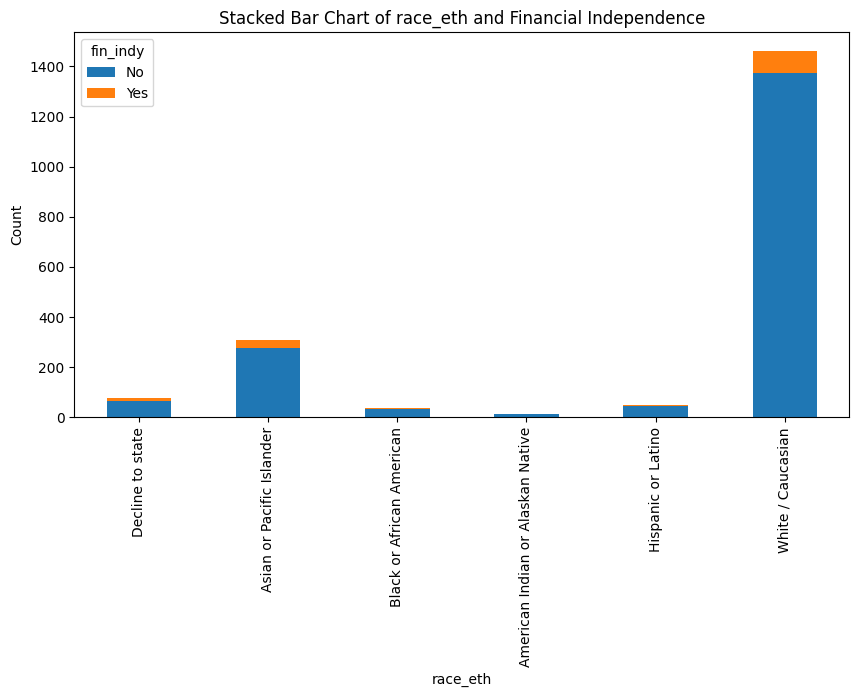

In [4]:
# @title Race plots

finance_reddit=pd.read_csv("https://drive.google.com/uc?export=download&id=1ETWbiXR3MsaGGWSBd3826j_HaFQnpClJ")
race = getting_pct(reddit_finance, "race_eth")
print(race)
create_hist(race, "race_eth")

In the next figure we can see the distribution in education

fin_indy                        edu    No  Yes   Sum   pct  pct_total
5         High School diploma / GED    18    4    22  0.18       0.01
4                   Graduate degree   517   52   569  0.09       0.29
9               Trade School Degree    10    1    11  0.09       0.01
0                Associate's Degree    36    3    39  0.08       0.02
3         Doctorate / Post-Graduate    92    8   100  0.08       0.05
1                 Bachelor's Degree  1074   74  1148  0.06       0.58
7           Some college, no degree    79    4    83  0.05       0.04
2         Doctorate / Post Graduate    16    0    16  0.00       0.01
6             Less than high school     1    0     1  0.00       0.00
8                  Some high school     3    0     3  0.00       0.00


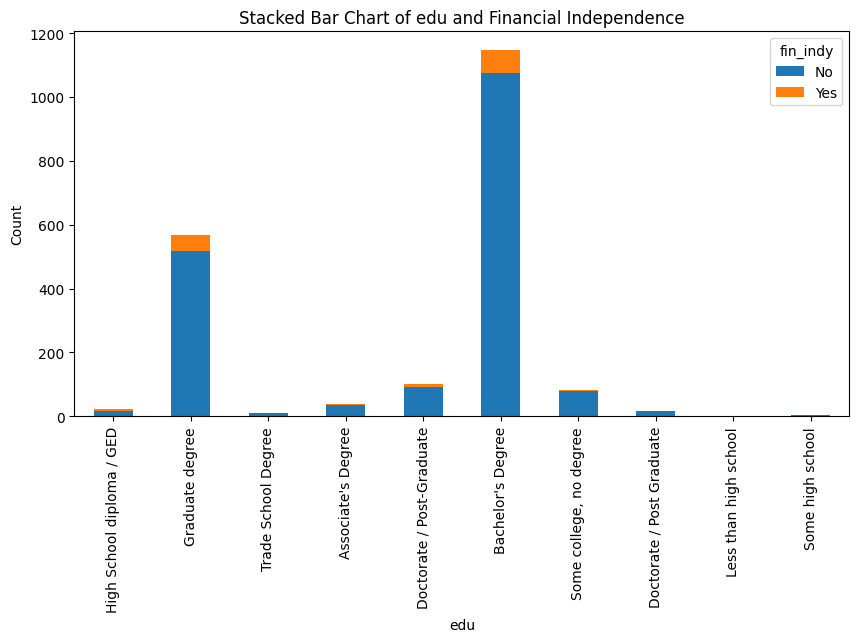

In [5]:
# @title Plotting education

edu = getting_pct(reddit_finance, "edu")
print(edu)
create_hist(edu, "edu")

In the next figure the distribution in gender


fin_indy            gender    No  Yes   Sum   pct  pct_total
0         Decline to State    24    5    29  0.17       0.01
3               Non-Binary     6    1     7  0.14       0.00
2                     Male  1501  119  1620  0.07       0.81
1                   Female   308   21   329  0.06       0.17
4               Non-binary     3    0     3  0.00       0.00


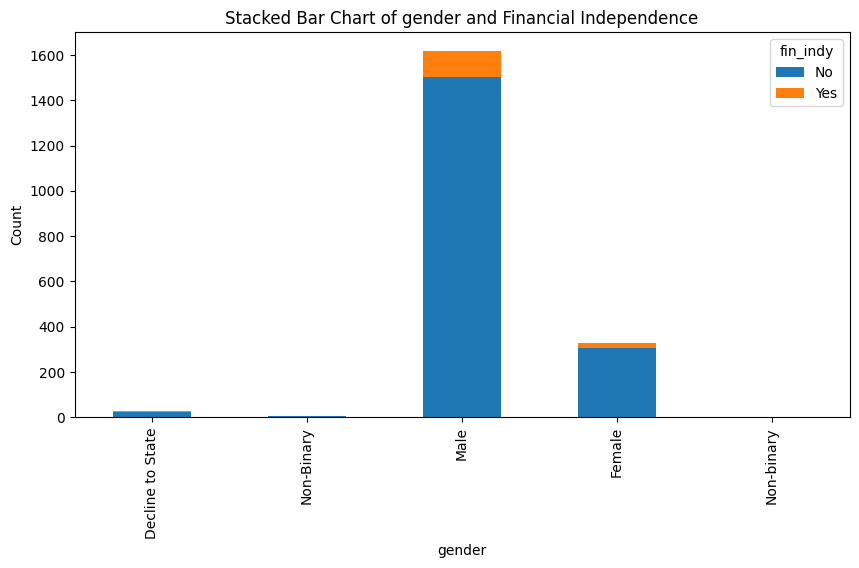

In [6]:
# @title Plot about gender distribution

gender = getting_pct(reddit_finance, "gender")
print(gender)
create_hist(gender, "gender")

# Conclusions

In this case is simple to recognize how the data is biased, the majority of the population is not white, not male and do not have a graduate degree. Using this data for further analysis could lead into biased results.